In [23]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
 

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import numpy as np
import pandas as pd
from helper import TelecomHelper
import plots


In [26]:
pd.set_option('max_column', None)
pd.options.display.float_format = "{:.6f}".format

In [27]:
CSV_PATH = "../data/cleaned_data.csv"

In [28]:
TelecomHelper = TelecomHelper()

In [29]:
df = TelecomHelper.read_csv(csv_path=CSV_PATH)

file read as csv


In [30]:
renamed_df = df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [31]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   duration                                  146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn                                    146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

***We Group our data by customer***

Session frequency of customers

In [32]:
agg_by_session_count = renamed_df.groupby('msisdn').agg({'bearer_id': 'count'})
session_freq_metrics = agg_by_session_count.sort_values(by=['bearer_id'], ascending = False)
session_freq_metrics.head(10)

,bearer_id
msisdn,
33626320676.000000,18
33614892860.000000,17
33625779332.000000,17
33659725664.000000,16
33675877202.000000,15
33760536639.000000,15
33667163239.000000,13
33603127838.000000,12
33760413819.000000,12


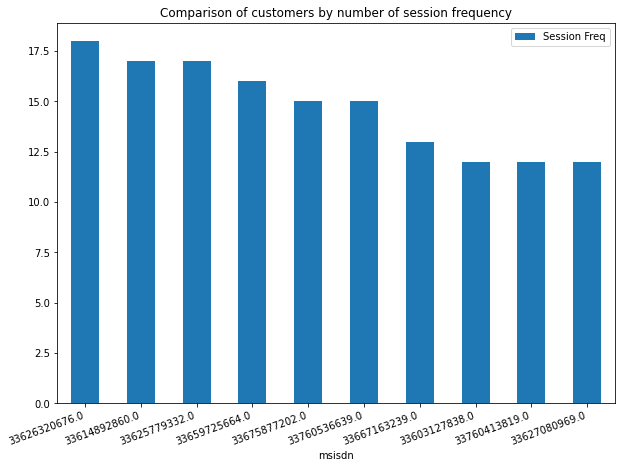

In [33]:
ax = session_freq_metrics.rename(columns={'bearer_id': 'Session Freq'}).head(10).plot.bar(
    y=['Session Freq'], 
    title="Comparison of customers by number of session frequency",
    figsize=(10,7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

Total Duration of customers

In [34]:
agg_by_duration = renamed_df.groupby('msisdn').agg({'duration': 'sum'})
duration_metrics = agg_by_duration.sort_values(by=['duration'], ascending = False)
duration_metrics.head(10)

,duration
msisdn,
33625779332.000000,18553754.000000
33614892860.000000,9966898.000000
33760536639.000000,9279434.000000
33626320676.000000,8791927.000000
33667163239.000000,8744914.000000
33664693736.000000,6288730.000000
33603127838.000000,6287761.000000
33667456716.000000,5649882.000000
33760413819.000000,5321667.000000


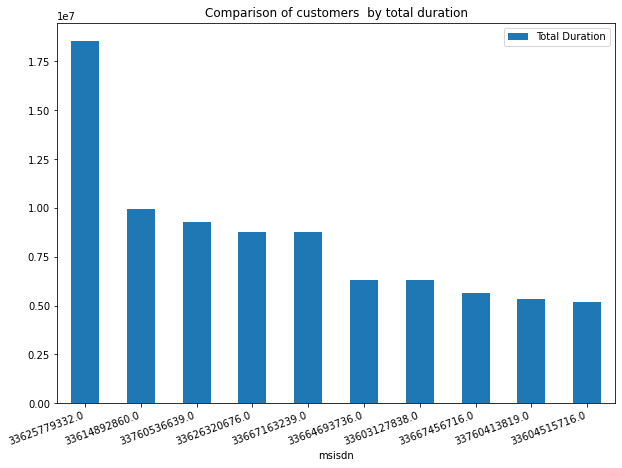

In [35]:
ax = duration_metrics.rename(columns={'duration': 'Total Duration'}).head(10).plot.bar(
    y=['Total Duration'], 
    title="Comparison of customers  by total duration",
    figsize=(10,7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

Toatal data or total traffic of customers

In [36]:
agg_by_data = renamed_df.groupby('msisdn').agg({'total_data': 'sum'})
traffic_metric = agg_by_data.sort_values(by=['total_data'], ascending = False)
traffic_metric.head(10)

,total_data
msisdn,
33614892860.000000,8846226494.000000
33760536639.000000,8514773963.000000
33625779332.000000,8499620722.000000
33626320676.000000,7971167261.000000
33675877202.000000,7891110608.000000
33659725664.000000,7705862783.000000
33666464084.000000,7308500938.000000
33760413819.000000,7132370514.000000
33664712899.000000,6872018208.000000


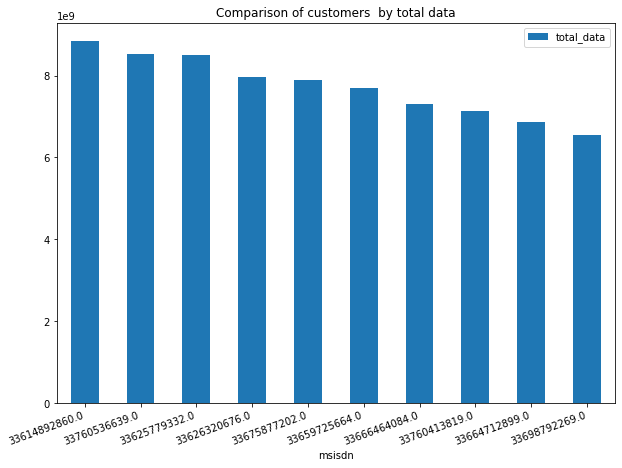

In [37]:
ax = traffic_metric.head(10).plot.bar(
    y=['total_data'], 
    title="Comparison of customers  by total data",
    figsize=(10,7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

In [38]:

engagment_metrics = renamed_df.groupby('msisdn').agg({'bearer_id': 'count','duration': 'sum', 'total_data': 'sum',})
engagment_metrics = engagment_metrics.rename(columns={'bearer_id': 'sessions_frequency', 'total_data': 'total_traffic'})
engagment_metrics.sort_values(by=['sessions_frequency'], ascending=False).head(10)

                                  

,sessions_frequency,duration,total_traffic
msisdn,,,
33626320676.000000,18,8791927.000000,7971167261.000000
33614892860.000000,17,9966898.000000,8846226494.000000
33625779332.000000,17,18553754.000000,8499620722.000000
33659725664.000000,16,4035428.000000,7705862783.000000
33675877202.000000,15,4865947.000000,7891110608.000000
33760536639.000000,15,9279434.000000,8514773963.000000
33667163239.000000,13,8744914.000000,5618394054.000000
33603127838.000000,12,6287761.000000,4976195043.000000
33760413819.000000,12,5321667.000000,7132370514.000000


#### Outlier Detection Using Box Plot

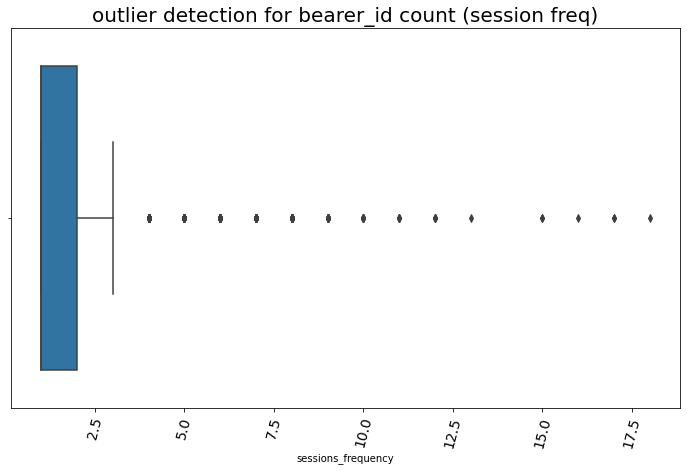

In [39]:
plots.plot_box(engagment_metrics, 'sessions_frequency', 'outlier detection for bearer_id count (session freq)')

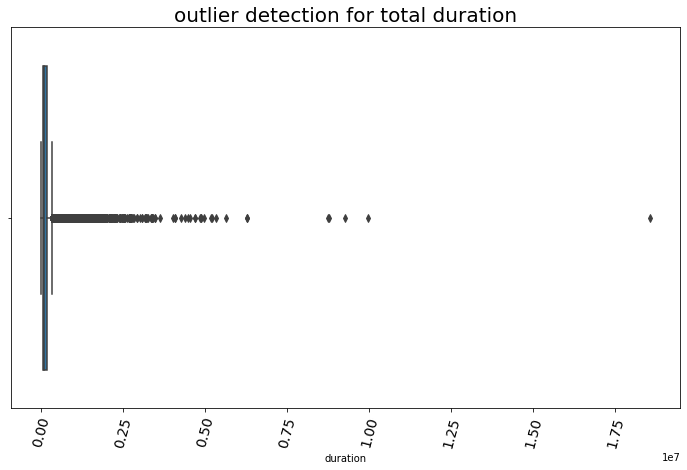

In [40]:
plots.plot_box(engagment_metrics, 'duration', 'outlier detection for total duration')

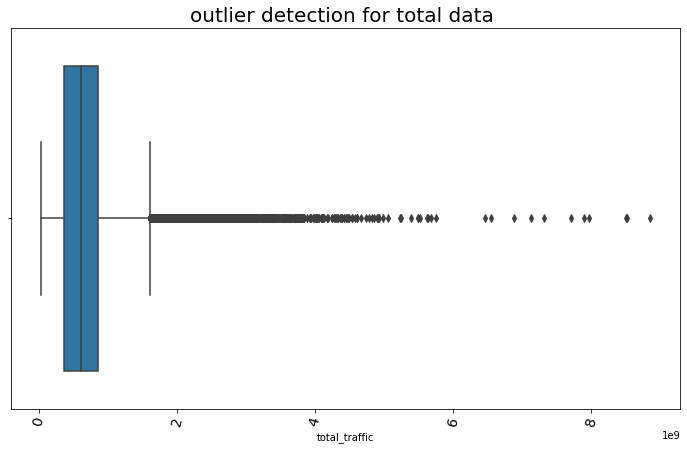

In [41]:
plots.plot_box(engagment_metrics, 'total_traffic', 'outlier detection for total data ')

#### As you can see from above we need to handle outliers for the above variables

In [42]:
"""
Handling the outliers by replacing values < lower bound by  the lower bound and,
values > higher bound by the higher bound value 
"""


def handle_outliers(df, col):
    df = df.copy()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    lower_bound = q1 - ((1.5) * (q3 - q1))
    upper_bound = q3 + ((1.5) * (q3 - q1))
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df




***Handling outliers***



In [43]:

cleaned_engagment_metrics = handle_outliers(engagment_metrics, 'sessions_frequency')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'duration')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'total_traffic')
cleaned_engagment_metrics.describe()


,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,105719.000000
mean,1.356634,130349.580378,662283010.076524
std,0.650007,87018.309018,394711651.731353
min,1.000000,7142.000000,33249009.000000
25%,1.000000,72729.000000,357950085.000000
50%,1.000000,103111.000000,616933544.000000
75%,2.000000,172799.000000,856473809.500000
max,3.500000,322904.000000,1604259396.250000


#### Cheking if the outliers are handled using box plots

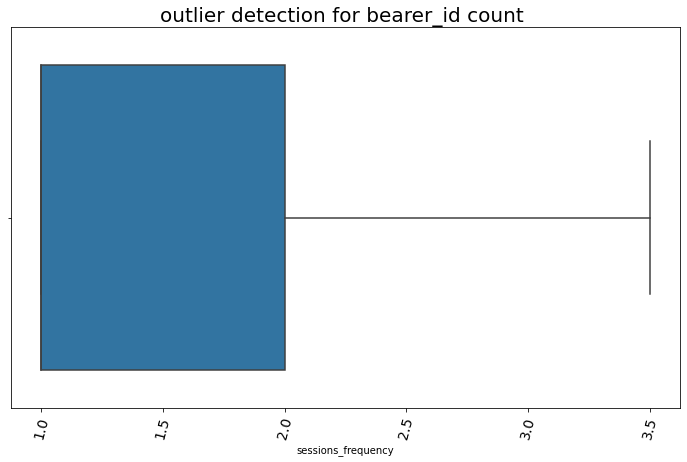

In [44]:
plots.plot_box(cleaned_engagment_metrics, 'sessions_frequency', 'outlier detection for bearer_id count ')


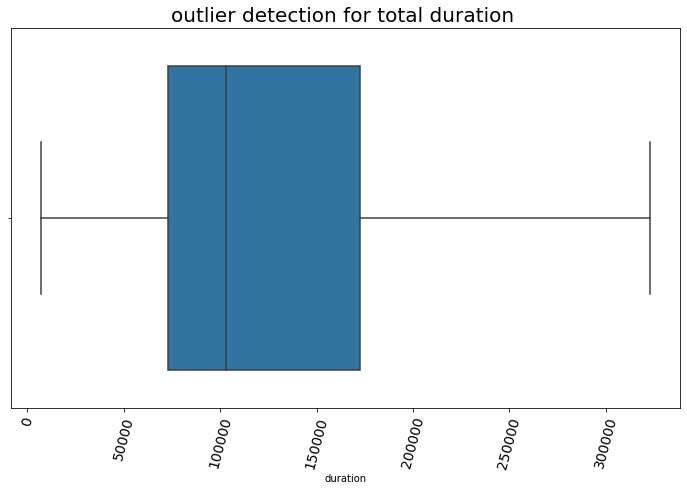

In [45]:
plots.plot_box(cleaned_engagment_metrics, 'duration', 'outlier detection for total duration ')


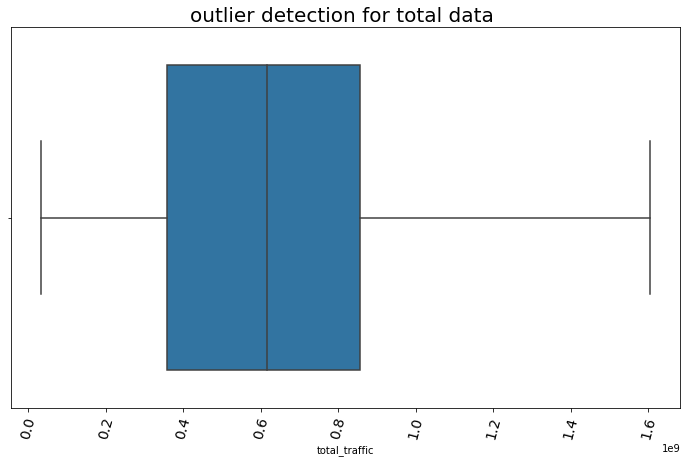

In [46]:
plots.plot_box(cleaned_engagment_metrics, 'total_traffic', 'outlier detection for total data ')


### Normalize each engagement metric

In [47]:


from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)
    

In [49]:

normalized_metrics = normalizer(cleaned_engagment_metrics, ['sessions_frequency', 'duration', 'total_traffic'])
normalized_metrics.describe()


,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,105719.000000
mean,0.000000,0.000281,1.000000
std,0.000000,0.000320,0.000000
min,0.000000,0.000008,0.999981
25%,0.000000,0.000112,1.000000
50%,0.000000,0.000195,1.000000
75%,0.000000,0.000319,1.000000
max,0.000000,0.006194,1.000000


<Figure size 648x504 with 0 Axes>

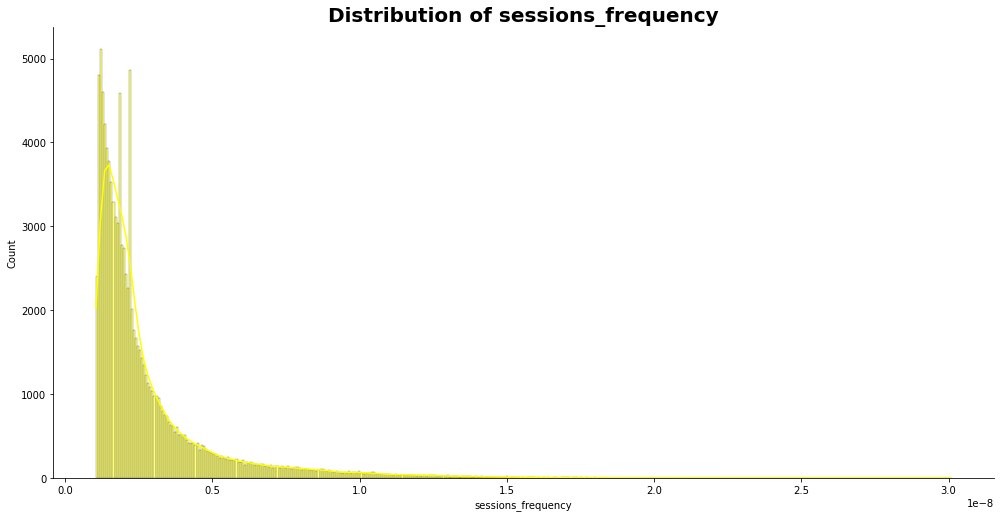

In [50]:

plots.plot_hist(normalized_metrics, 'sessions_frequency', 'yellow')



<Figure size 648x504 with 0 Axes>

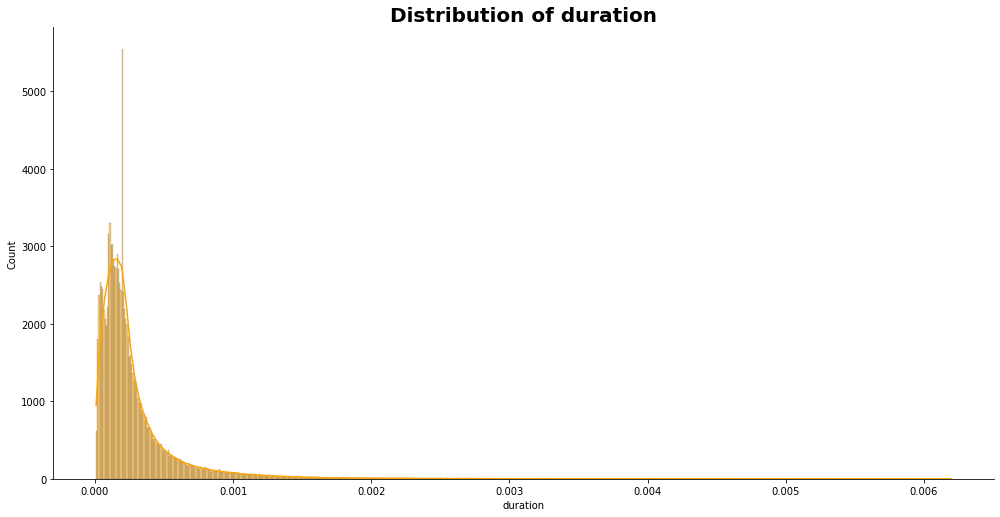

In [51]:
plots.plot_hist(normalized_metrics, 'duration', 'orange')


<Figure size 648x504 with 0 Axes>

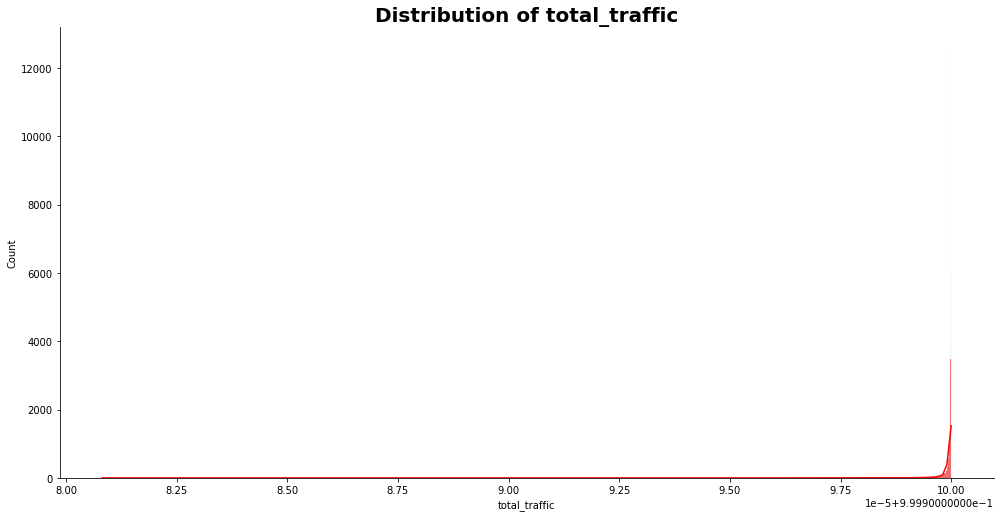

In [52]:

plots.plot_hist(normalized_metrics, 'total_traffic', 'red')


In [53]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   duration                                  146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn                                    146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

### Top 10 most engaged users per application


#### A. Top 10 most engaged users  for social media, email and google

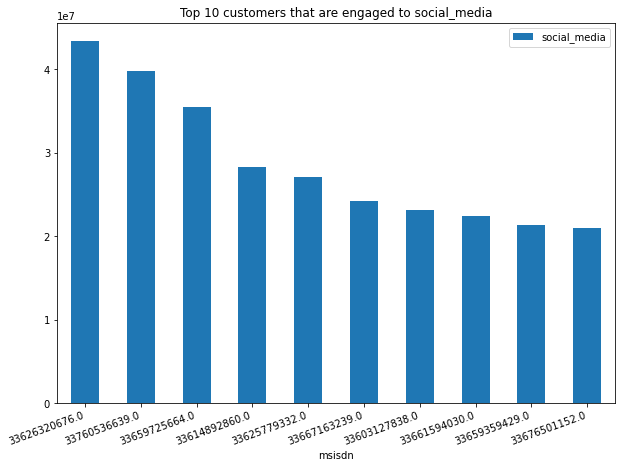

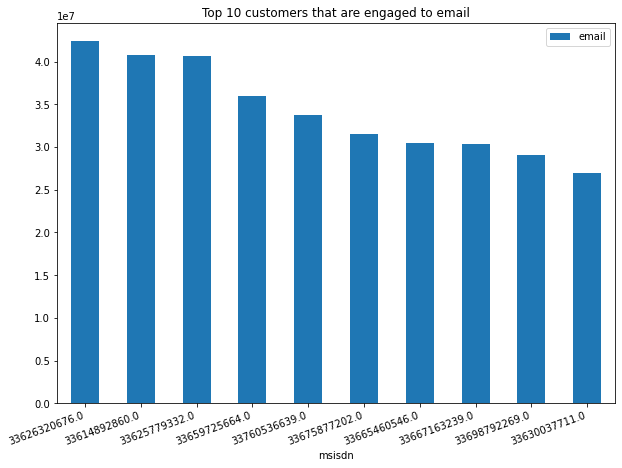

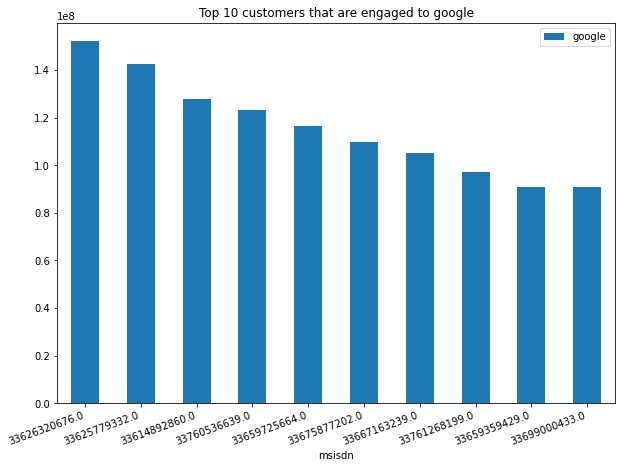

In [54]:

app_cols = ['social_media', 'email', 'google']

for app in app_cols:
    
    app_agg = renamed_df.groupby('msisdn').agg({app : 'sum'})
    top_app_users = app_agg.sort_values(by=[app], ascending=False).head(10)
    ax = top_app_users.plot.bar(
        y=[app], 
        title=f"Top 10 customers that are engaged to {app}",
        figsize=(10,7))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    plt.show()


#### B. Top 10 most engaged users  for youtube, netflix and gaming

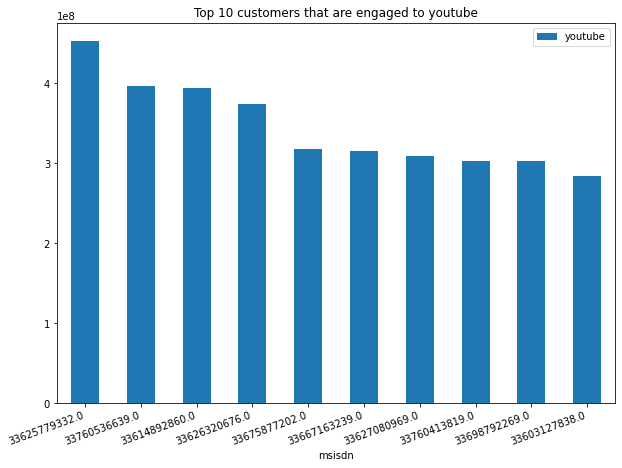

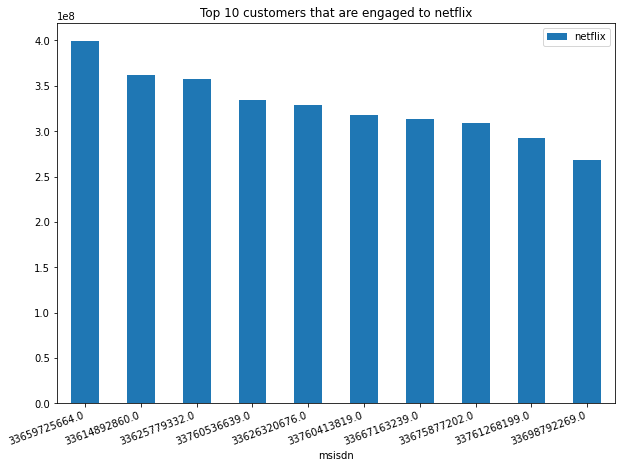

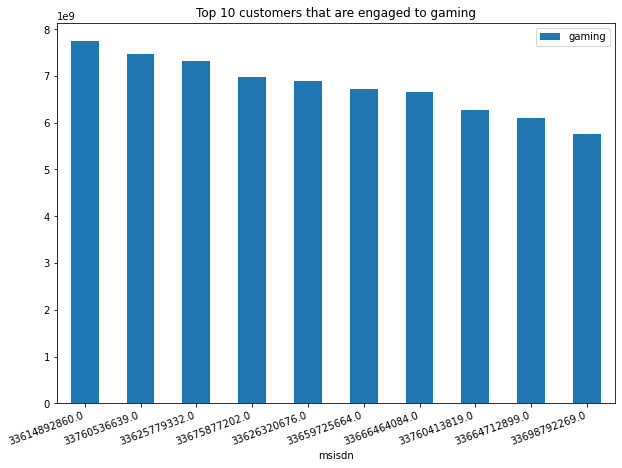

In [55]:
app_cols = ['youtube', 'netflix', 'gaming']

for app in app_cols:
    
    app_agg = renamed_df.groupby('msisdn').agg({app : 'sum'})
    top_app_users = app_agg.sort_values(by=[app], ascending=False).head(10)
    ax = top_app_users.plot.bar(
        y=[app], 
        title=f"Top 10 customers that are engaged to {app}",
        figsize=(10,7))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    plt.show()

In [61]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   duration                                  146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn                                    146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

#### Top 3 most used applications 

In [62]:
app_metrics  = renamed_df[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming']]

In [63]:

app_total_df = pd.DataFrame(columns=['app', 'total'])
app_total_df['app'] = app_cols

app_metrics
app_totals = [ ]
for app in app_cols:
    app_totals.append(app_metrics.sum()[app])
app_total_df['total'] =app_totals
    


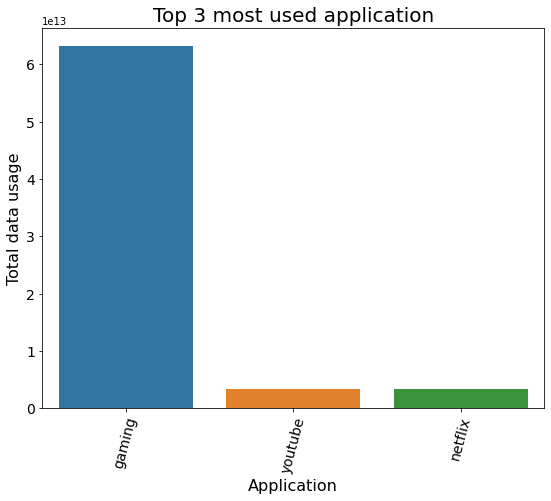

In [64]:

top_3_apps = app_total_df.sort_values(by=['total'],
                                  ascending = False).head(3)
plots.plot_bar(top_3_apps, x_col='app', y_col='total', title="Top 3 most used application", 
               xlabel="Application", ylabel="Total data usage")


In [65]:
top_apps = app_total_df.sort_values(by=['total'], ascending=False)
                                        
px.pie(top_apps, values="total",
                     names="app", width=700, height=500)

***Gaming application is by far the most engaged application contributing 88.3% of the total data***

***The next most engaged application only youtube contributes 4.64% of the total data***

### Clustring using k-means

In [105]:
normalized_metrics = normalizer(cleaned_engagment_metrics, ['sessions_frequency', 'duration', 'total_traffic'])

kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagment_metrics_with_cluster = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster['clusters'] = pred


In [71]:
def cluser_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)
    

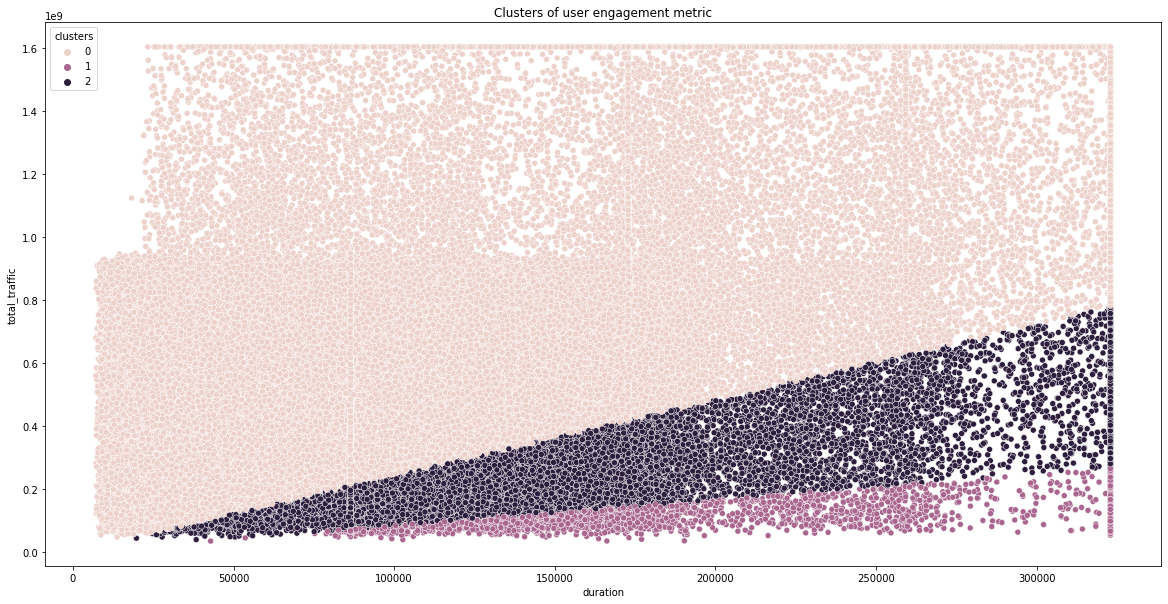

0    87705
2    15631
1     2383
Name: clusters, dtype: int64

In [72]:

# labels = ['cluser_1', 'cluser_2', 'cluser_3']

# engagment_metrics_with_cluster['clusters']  = engagment_metrics_with_cluster['clusters'].map(lambda x:
#                                                                                              cluser_label(x, labels))
engagment_metrics_with_cluster['clusters'].value_counts()

plt.figure(figsize=(20,10))

sns.scatterplot(x = 'duration', y='total_traffic',
                hue='clusters', data=engagment_metrics_with_cluster).set_title('Clusters of user engagement metric')

plt.show()
# engagment_metrics_with_cluster.describe()
engagment_metrics_with_cluster['clusters'].value_counts()


In [73]:
# engagment_metrics_with_cluster.groupby('duration').agg()

In [74]:

print("Describing cluser 1 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 0]
cluser_1.describe()


Describing cluser 1 


,sessions_frequency,duration,total_traffic,clusters
count,87705.000000,87705.000000,87705.000000,87705.000000
mean,1.405365,122253.527302,745966899.687464,0.000000
std,0.686016,86581.409448,376207677.204268,0.000000
min,1.000000,7142.000000,46047479.000000,0.000000
25%,1.000000,58209.000000,474137207.000000,0.000000
50%,1.000000,93603.000000,696483105.000000,0.000000
75%,2.000000,170079.000000,895917289.000000,0.000000
max,3.500000,322904.000000,1604259396.250000,0.000000


In [75]:
print("Describing cluser 2 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 1]
cluser_1.describe()

Describing cluser 2 


,sessions_frequency,duration,total_traffic,clusters
count,2383.000000,2383.000000,2383.000000,2383.000000
mean,1.018884,194133.220730,115475647.568191,1.000000
std,0.136143,70347.619396,44926149.788087,0.000000
min,1.000000,42856.000000,33249009.000000,1.000000
25%,1.000000,141528.000000,82440488.000000,1.000000
50%,1.000000,173795.000000,105504047.000000,1.000000
75%,1.000000,247285.500000,135168385.000000,1.000000
max,2.000000,322904.000000,265530871.000000,1.000000


In [76]:
print("Describing cluser 3 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 2]
cluser_1.describe()

Describing cluser 3 


,sessions_frequency,duration,total_traffic,clusters
count,15631.000000,15631.000000,15631.000000,15631.000000
mean,1.134700,166052.217452,276098275.032691,2.000000
std,0.366341,78330.800704,158957689.809059,0.000000
min,1.000000,19764.000000,38022357.000000,2.000000
25%,1.000000,96834.500000,155717831.500000,2.000000
50%,1.000000,151391.000000,230065552.000000,2.000000
75%,1.000000,215110.000000,354339295.500000,2.000000
max,3.500000,322904.000000,777517138.000000,2.000000


Now let's save the engagement metrics

In [77]:
TelecomHelper.save_csv(engagment_metrics_with_cluster, "../data/user_engagement.csv")

File Successfully Saved.!!!


,sessions_frequency,duration,total_traffic,clusters
msisdn,,,,
33601001722.000000,1.000000,116720.000000,878690574.000000,0
33601001754.000000,1.000000,181230.000000,156859643.000000,2
33601002511.000000,1.000000,134969.000000,595966483.000000,0
33601007832.000000,1.000000,49878.000000,422320698.000000,0
33601008617.000000,2.000000,37104.000000,1457410944.000000,0
...,...,...,...,...
33789967113.000000,1.000000,160461.000000,208123067.000000,2
33789980299.000000,2.000000,210389.000000,1094693386.000000,0
33789996170.000000,1.000000,8810.000000,714641641.000000,0


#### Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics

In [111]:

inertias = []
for k in range(1, 20):
    
    kmeans_2 = KMeans(n_clusters=k, init='k-means++').fit(normalized_metrics)
    inertias.append([k, kmeans.inertia_])

 



[[1, 0.002369645876059289],
 [2, 0.002369645876059289],
 [3, 0.002369645876059289],
 [4, 0.002369645876059289],
 [5, 0.002369645876059289],
 [6, 0.002369645876059289],
 [7, 0.002369645876059289],
 [8, 0.002369645876059289],
 [9, 0.002369645876059289],
 [10, 0.002369645876059289],
 [11, 0.002369645876059289],
 [12, 0.002369645876059289],
 [13, 0.002369645876059289],
 [14, 0.002369645876059289],
 [15, 0.002369645876059289],
 [16, 0.002369645876059289],
 [17, 0.002369645876059289],
 [18, 0.002369645876059289],
 [19, 0.002369645876059289]]

##### Finding the optimal value for k by identifying the elbow from k_value to intertial graph

In [114]:

k_df = pd.DataFrame(columns=['k', 'inertia'])
k_df['k'] = [i[0] for i in inertias]
k_df['inertia'] = [i[1] for i in inertias]


plt.figure(figsize=(10,7))

k_df.plot( x='k', y='inertia', linestyle='-',
          marker='o', figsize=(10,7), title='K values').set_xlabel("K values")
plt.xticks(np.arange(len(k_df.index)))
plt.xlabel('K value')
plt.ylabel('Inertia')


k_df.plot(inertias, linestyle='-', marker='o', )


#### The interia value starts to decrease very slowly as the k value decreases beyond 3
#### The k value for the elbow point is b/n 3 and 4
#### And i have selected 3 as k value

In [82]:
kmeans_2 = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans_2.predict(normalized_metrics)

engagment_metrics_with_cluster2 = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster2['clusters'] = pred




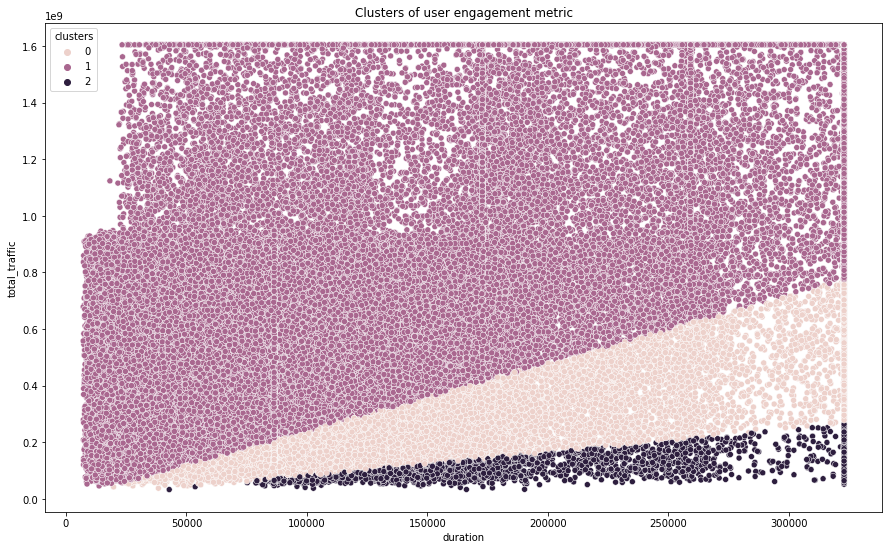

In [83]:
# labels = ['cluser_1', 'cluser_2', 'cluser_3', 'cluser_4']

# engagment_metrics_with_cluster['clusters']  = engagment_metrics_with_cluster['clusters'].map(lambda x:
#                                                                                              cluser_label(x, labels))
engagment_metrics_with_cluster['clusters'].value_counts()
plt.figure(figsize=(15,9))

sns.scatterplot(x = 'duration', y='total_traffic',
                hue='clusters', data=engagment_metrics_with_cluster2).set_title('Clusters of user engagement metric')

plt.show()


In [87]:

cluster_avg = engagment_metrics_with_cluster.groupby('clusters').agg({'sessions_frequency':'mean', 
                                                       'duration':'mean', 'total_traffic': 'mean'})


In [88]:
print("The mean of each metrics for per cluster")
cluster_avg

The mean of each metrics for per cluster


,sessions_frequency,duration,total_traffic
clusters,,,
0,1.405365,122253.527302,745966899.687464
1,1.018884,194133.220730,115475647.568191
2,1.134700,166052.217452,276098275.032691


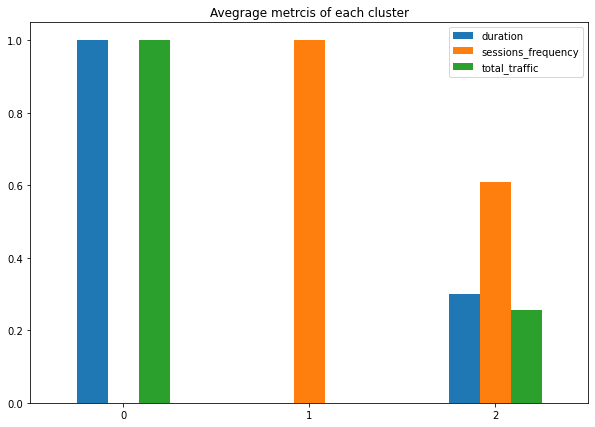

In [89]:

scaled_cluster_avg = scaler(cluster_avg, ['duration', 'sessions_frequency', 'total_traffic'] )

ax = scaled_cluster_avg.plot.bar( y=['duration', 'sessions_frequency',  'total_traffic'],  title="Avegrage metrcis of each cluster",
                          rot=0, figsize=(10,7))

You can infer from the above graph (which shows the mean of a scaled metrics for each cluser), ***cluster 0*** has highest duration and highest total traffic. ***cluster 1*** has lowest total traffic and duration.

In [90]:
# Saving our enagagment metrics
TelecomHelper.save_csv(engagment_metrics_with_cluster, "../data/user_engagement.csv")

File Successfully Saved.!!!


,sessions_frequency,duration,total_traffic,clusters
msisdn,,,,
33601001722.000000,1.000000,116720.000000,878690574.000000,0
33601001754.000000,1.000000,181230.000000,156859643.000000,2
33601002511.000000,1.000000,134969.000000,595966483.000000,0
33601007832.000000,1.000000,49878.000000,422320698.000000,0
33601008617.000000,2.000000,37104.000000,1457410944.000000,0
...,...,...,...,...
33789967113.000000,1.000000,160461.000000,208123067.000000,2
33789980299.000000,2.000000,210389.000000,1094693386.000000,0
33789996170.000000,1.000000,8810.000000,714641641.000000,0


## Task 4.1 A

engagement score to each user. 

In [94]:
kmeans_2


KMeans(n_clusters=3)

In [95]:
distance = kmeans.fit_transform(normalized_metrics)

distance_from_less_engagement = list(map(lambda x : x[0], distance))

engagment_metrics_with_cluster['score'] = distance_from_less_engagement


In [98]:
engagment_metrics_with_cluster['msisdn'] = engagment_metrics_with_cluster.index
engagment_metrics_with_cluster.head()

,sessions_frequency,duration,total_traffic,clusters,score,msisdn
msisdn,,,,,,
33601001722.000000,1.000000,116720.000000,878690574.000000,0,0.000142,33601001722.000000
33601001754.000000,1.000000,181230.000000,156859643.000000,2,0.000880,33601001754.000000
33601002511.000000,1.000000,134969.000000,595966483.000000,0,0.000049,33601002511.000000
33601007832.000000,1.000000,49878.000000,422320698.000000,0,0.000157,33601007832.000000
33601008617.000000,2.000000,37104.000000,1457410944.000000,0,0.000250,33601008617.000000


In [99]:
TelecomHelper.save_csv(engagment_metrics_with_cluster, "../data/user_engagement.csv")

File Successfully Saved.!!!


,sessions_frequency,duration,total_traffic,clusters,score,msisdn
msisdn,,,,,,
33601001722.000000,1.000000,116720.000000,878690574.000000,0,0.000142,33601001722.000000
33601001754.000000,1.000000,181230.000000,156859643.000000,2,0.000880,33601001754.000000
33601002511.000000,1.000000,134969.000000,595966483.000000,0,0.000049,33601002511.000000
33601007832.000000,1.000000,49878.000000,422320698.000000,0,0.000157,33601007832.000000
33601008617.000000,2.000000,37104.000000,1457410944.000000,0,0.000250,33601008617.000000
...,...,...,...,...,...,...
33789967113.000000,1.000000,160461.000000,208123067.000000,2,0.000496,33789967113.000000
33789980299.000000,2.000000,210389.000000,1094693386.000000,0,0.000083,33789980299.000000
33789996170.000000,1.000000,8810.000000,714641641.000000,0,0.000263,33789996170.000000
